In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [97]:
#loading the csv data
crypto_df=pd.read_csv("Resources/crypto_data.csv")

In [98]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [99]:
#value counts for total coin supply
crypto_df['TotalCoinSupply'].value_counts()

0             92
21000000      64
100000000     62
1000000000    43
50000000      23
              ..
39200000       1
270875968      1
9736000        1
3652422000     1
233100000      1
Name: TotalCoinSupply, Length: 546, dtype: int64

In [100]:
crypto_df=crypto_df[crypto_df['IsTrading']==True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [101]:
#Discarding all cryptocurrencies that are not being traded
crypto_df.drop('IsTrading', axis=1, inplace=True)

/Users/sudippandey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [102]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [103]:
#looking for nan value
crypto_df.isna().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [104]:
#Filtering the  cryptocurrencies that have been mined
crypto_df=crypto_df[crypto_df['TotalCoinsMined']>0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [105]:
#looking for nan value
crypto_df.isna().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [106]:
 # deleting the CoinName from the original dataframe
crypto_df.drop(['CoinName','Unnamed: 0'], axis=1, inplace=True)

/Users/sudippandey/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [112]:
crypto_df['TotalCoinSupply']=crypto_df['TotalCoinSupply'].astype(float)

/var/folders/ld/_spx9cwj74z4zm921xp1zssh0000gn/T/ipykernel_94077/3820561744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crypto_df['TotalCoinSupply']=crypto_df['TotalCoinSupply'].astype(float)


In [113]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [114]:
#converting the  features with text values, Algorithm and ProofType, into numerical data
final_df=pd.get_dummies(crypto_df)

In [115]:
final_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
#Standardizing  dataset
std_scr=StandardScaler()
scaled_data=std_scr.fit_transform(final_df)
scaled_data.shape

(532, 98)

## Dimensionality Reduction

In [117]:
# dimensionality reduction with PCA
pca=PCA(n_components=0.90)
pca_data=pca.fit_transform(scaled_data)
pca_data.shape

(532, 74)

In [118]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [119]:
df_pca=pd.DataFrame(data=pca_data)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.417255e-15,-1.223976e-16,-0.007129,-1.319756,-0.051813,...,7.930746e-17,1.066184e-15,2.929092e-15,-7.260564e-16,-1.958946e-15,1.858141e-15,-1.863509e-15,7.873066e-16,-1.846167e-18,-4.153611e-15
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.575109e-15,-2.141355e-16,-0.007739,-1.322514,-0.056674,...,5.236227e-17,3.558103e-16,3.123007e-15,-5.243003e-17,-1.703046e-15,1.069014e-15,-1.856951e-15,1.174094e-15,5.251165e-16,-3.804973e-15
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-6.700325e-15,7.872127e-15,-0.054781,-1.542879,-0.943951,...,3.638111e-14,-1.841986e-14,-5.521324e-14,-7.303804e-14,2.329683e-14,-3.527460e-14,3.114482e-14,2.752079e-14,-2.364644e-14,2.844002e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,2.357806e-15,-1.697979e-15,-0.002071,0.281463,0.251862,...,4.765898e-15,2.352318e-17,-2.522688e-14,6.604406e-15,-9.542520e-15,-1.391009e-14,2.591484e-15,2.225494e-15,4.614234e-15,4.660314e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,2.706411e-15,-1.587523e-15,0.027735,0.519099,0.188820,...,-3.035501e-14,6.137487e-14,-3.172419e-14,-3.873903e-14,-7.522860e-14,-7.057959e-14,4.784940e-14,9.436182e-15,1.251016e-13,-3.544121e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-1.632875e-11,-2.711489e-16,2.473714e-14,-0.851713,2.041159,3.560713,...,6.684700e-15,-3.061189e-15,-2.229751e-14,7.766080e-15,-1.101111e-14,-1.411705e-14,6.264833e-15,4.319524e-15,2.107777e-15,3.175551e-15
528,-0.333144,1.032071,-0.590740,0.001399,2.739500e-12,-5.504781e-15,-1.453662e-16,-0.007154,-1.320125,-0.052460,...,3.692569e-16,9.833620e-16,2.767404e-15,-6.656252e-16,-1.742869e-15,1.734683e-15,-1.547654e-15,8.908817e-16,-1.034381e-16,-3.825012e-15
529,0.324349,-2.312308,0.421515,-0.001319,-2.587411e-12,3.997274e-15,-3.487809e-15,0.017309,0.161077,-0.047787,...,6.026022e-14,-2.007744e-14,-4.398437e-15,7.478438e-14,-1.425238e-14,3.053233e-14,4.840763e-14,1.935789e-14,-8.678967e-15,-3.669176e-14
530,-0.149364,-2.049336,0.412968,-0.001745,-3.429876e-12,4.424198e-15,-2.699327e-15,0.028954,0.544389,0.233373,...,-7.154097e-16,3.560882e-15,-1.737890e-15,2.785750e-15,-5.688399e-16,5.725577e-16,-2.042620e-15,-1.782551e-15,-2.035793e-16,-4.381608e-16


In [120]:
# further reducing the dataset dimensions with t-SNE
tsne=TSNE(learning_rate=35)

In [121]:
tsne_features=tsne.fit_transform(pca_data)

In [122]:
tsne_features.shape

(532, 2)

In [123]:
x=tsne_features[:,0]
y=tsne_features[:,1]

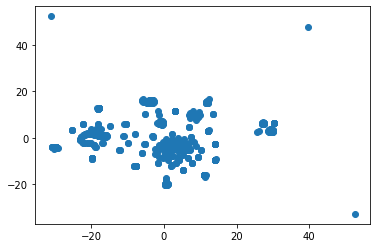

In [124]:
#scatter plot of the t-SNE output
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [125]:
df_tsne=pd.DataFrame(data=tsne_features)
df_tsne

,0,1
0,-15.751376,0.590935
1,-22.397825,-1.948136
2,-29.167643,-4.494619
3,29.452503,3.675231
4,14.091262,-9.293118
...,...,...
527,26.092161,2.809858
528,-21.744278,1.414062
529,1.017529,-19.905989
530,10.979334,-15.758528


## Cluster Analysis with k-Means

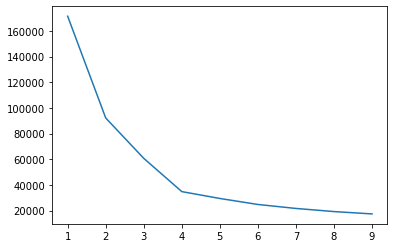

In [126]:
inertia=[]
for k in range(1,10):
    model=KMeans(n_clusters=k)
    model.fit(tsne_features)
    inertia.append(model.inertia_)
plt.plot(range(1,10), inertia)
plt.show()

In [127]:
# Identify the best number of clusters using the elbow curve
model=KMeans(n_clusters=4)
model.fit(tsne_features)

KMeans(n_clusters=4)

In [128]:
model.predict(tsne_features)

array([0, 0, 0, 1, 3, 3, 2, 3, 3, 3, 2, 3, 1, 1, 3, 0, 2, 3, 0, 0, 3, 3,
       1, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 1, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 0, 2, 3, 2, 1, 3, 3, 3, 0, 3, 3, 2, 3, 1, 2, 0, 3,
       1, 3, 0, 3, 0, 0, 0, 3, 3, 3, 2, 2, 1, 3, 1, 0, 2, 1, 1, 1, 2, 0,
       0, 3, 3, 3, 3, 2, 3, 1, 0, 0, 3, 3, 3, 2, 3, 1, 0, 3, 2, 3, 0, 3,
       2, 3, 0, 0, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 1, 3, 2, 0, 2, 3, 1, 0,
       2, 2, 3, 3, 2, 3, 0, 2, 1, 0, 2, 1, 0, 3, 3, 1, 2, 3, 1, 1, 0, 0,
       2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 2, 0, 0, 0,
       0, 2, 2, 3, 2, 0, 3, 1, 1, 2, 0, 3, 0, 3, 2, 1, 3, 3, 0, 2, 0, 2,
       3, 2, 0, 0, 2, 0, 3, 3, 2, 2, 3, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 0,
       2, 0, 0, 2, 3, 0, 2, 0, 0, 0, 3, 3, 3, 3, 0, 1, 2, 0, 2, 0, 3, 2,
       3, 3, 0, 2, 3, 0, 3, 3, 2, 3, 2, 0, 2, 3, 2, 2, 0, 2, 2, 0, 0, 0,
       1, 2, 3, 2, 1, 2, 0, 0, 1, 3, 2, 3, 0, 3, 2, 3, 3, 0, 2, 0, 0, 3,
       0, 3, 2, 2, 0, 3, 0, 3, 3, 0, 2, 2, 0, 1, 2,

In [129]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [130]:
clusters=get_clusters(4,df_pca )
clusters

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,class
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.417255e-15,-1.223976e-16,-0.007129,-1.319756,-0.051813,...,1.066184e-15,2.929092e-15,-7.260564e-16,-1.958946e-15,1.858141e-15,-1.863509e-15,7.873066e-16,-1.846167e-18,-4.153611e-15,0
1,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.575109e-15,-2.141355e-16,-0.007739,-1.322514,-0.056674,...,3.558103e-16,3.123007e-15,-5.243003e-17,-1.703046e-15,1.069014e-15,-1.856951e-15,1.174094e-15,5.251165e-16,-3.804973e-15,0
2,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-6.700325e-15,7.872127e-15,-0.054781,-1.542879,-0.943951,...,-1.841986e-14,-5.521324e-14,-7.303804e-14,2.329683e-14,-3.527460e-14,3.114482e-14,2.752079e-14,-2.364644e-14,2.844002e-14,0
3,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,2.357806e-15,-1.697979e-15,-0.002071,0.281463,0.251862,...,2.352318e-17,-2.522688e-14,6.604406e-15,-9.542520e-15,-1.391009e-14,2.591484e-15,2.225494e-15,4.614234e-15,4.660314e-15,0
4,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,2.706411e-15,-1.587523e-15,0.027735,0.519099,0.188820,...,6.137487e-14,-3.172419e-14,-3.873903e-14,-7.522860e-14,-7.057959e-14,4.784940e-14,9.436182e-15,1.251016e-13,-3.544121e-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-1.632875e-11,-2.711489e-16,2.473714e-14,-0.851713,2.041159,3.560713,...,-3.061189e-15,-2.229751e-14,7.766080e-15,-1.101111e-14,-1.411705e-14,6.264833e-15,4.319524e-15,2.107777e-15,3.175551e-15,0
528,-0.333144,1.032071,-0.590740,0.001399,2.739500e-12,-5.504781e-15,-1.453662e-16,-0.007154,-1.320125,-0.052460,...,9.833620e-16,2.767404e-15,-6.656252e-16,-1.742869e-15,1.734683e-15,-1.547654e-15,8.908817e-16,-1.034381e-16,-3.825012e-15,0
529,0.324349,-2.312308,0.421515,-0.001319,-2.587411e-12,3.997274e-15,-3.487809e-15,0.017309,0.161077,-0.047787,...,-2.007744e-14,-4.398437e-15,7.478438e-14,-1.425238e-14,3.053233e-14,4.840763e-14,1.935789e-14,-8.678967e-15,-3.669176e-14,0
530,-0.149364,-2.049336,0.412968,-0.001745,-3.429876e-12,4.424198e-15,-2.699327e-15,0.028954,0.544389,0.233373,...,3.560882e-15,-1.737890e-15,2.785750e-15,-5.688399e-16,5.725577e-16,-2.042620e-15,-1.782551e-15,-2.035793e-16,-4.381608e-16,0


In [131]:
clusters=get_clusters(4,df_tsne )
clusters

,0,1,class
0,-15.751376,0.590935,1
1,-22.397825,-1.948136,1
2,-29.167643,-4.494619,1
3,29.452503,3.675231,3
4,14.091262,-9.293118,0
...,...,...,...
527,26.092161,2.809858,3
528,-21.744278,1.414062,1
529,1.017529,-19.905989,0
530,10.979334,-15.758528,0


In [132]:
 def show_clusters(df):
    plt.scatter(df[0], df[1], c=df['class'])
    plt.show()

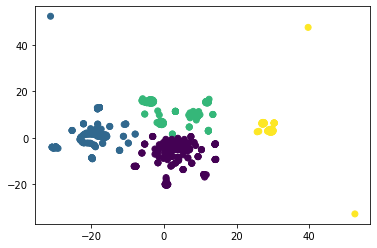

In [133]:
show_clusters(clusters)

In [ ]:
## It looks like it is difficult to cluster the cryptocurriencies together. 